In [322]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/big-mart-sales-prediction/Submission.csv
/kaggle/input/big-mart-sales-prediction/Train.csv
/kaggle/input/big-mart-sales-prediction/Test.csv


### Importing Libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Loading the Dataset

In [75]:
test_url = '/kaggle/input/big-mart-sales-prediction/Test.csv'
train_url = '/kaggle/input/big-mart-sales-prediction/Train.csv'

train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

In [76]:
# View of data
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [77]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [78]:
# Shape of data
train_df.shape

(8523, 12)

In [79]:
test_df.shape

(5681, 11)

In [80]:
df = pd.concat([train_df,test_df])
df.reset_index(drop=True,inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [81]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


In [82]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [83]:
# Statistical Information about data
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [84]:
# Checking for unique values in the all features
df.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

### Data Preprocessing

In [85]:
# Filling NUll Values by Checking their precentage
df.isnull().sum() / df.shape[0]

Item_Identifier              0.000000
Item_Weight                  0.171712
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282737
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.399958
dtype: float64

In [86]:
# check for categorical columns
cat_columns = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat_columns.append(col)
        
cat_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [87]:
# Removing Item Identifier and Outlet Identifier as they are unique and like unique values 
cat_columns.remove('Item_Identifier')
cat_columns.remove('Outlet_Identifier')

In [88]:
cat_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [89]:
for col in cat_columns:
    print(df[col].value_counts())
    print('==========================')

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64
Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64
Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count, dtype: int64
Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: count, dtype: int64
Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: count, dtype: int64


In [90]:
# As the missing percentage is less than 5%, I am using CCA to fill the values with mean
# and mode, but I am doing it by getting the mean of respective item identifier, because 
# Item weight is dependent on Item identifier
item_weight_mean = pd.pivot_table(data=df,values='Item_Weight',index='Item_Identifier',aggfunc='mean')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [91]:
# Get the Item Identifier of those rows which are missing and store them, so that 
# we can store the mean wrt to the Identifier
missing_item_weight = df[df['Item_Weight'].isnull()]['Item_Identifier']
missing_item_weight

7        FDP10
18       DRI11
21       FDW12
23       FDC37
29       FDC14
         ...  
14178    FDX32
14179    FDC39
14184    DRG37
14188    DRE03
14192    FDN31
Name: Item_Identifier, Length: 2439, dtype: object

In [92]:
for i, item in enumerate(df['Item_Identifier']):
    if i in missing_item_weight.index:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(train_df['Item_Weight'])

In [93]:
# Checking for Null values
df['Item_Weight'].isnull().sum()

0

In [94]:
# For filling outlet_size, I am using outlet type as a corresponding column 
mode_outlet_size = pd.pivot_table(data=df,values='Outlet_Size',index='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
mode_outlet_size

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [95]:
missing_outlet_size = df[df['Outlet_Size'].isnull()]['Outlet_Type']
missing_outlet_size

3            Grocery Store
8        Supermarket Type1
9        Supermarket Type1
25       Supermarket Type1
28           Grocery Store
               ...        
14191        Grocery Store
14193    Supermarket Type1
14201    Supermarket Type1
14202    Supermarket Type1
14203    Supermarket Type1
Name: Outlet_Type, Length: 4016, dtype: object

In [96]:
for i, item in enumerate(df['Outlet_Type']):
    if i in missing_outlet_size.index:
        df['Outlet_Size'][i] = mode_outlet_size.loc[item]['Outlet_Size']

In [97]:
# Check for Null values
df['Outlet_Size'].isnull().sum()

0

In [98]:
sum(df['Item_Visibility'] == 0)

879

In [99]:
# Change the visibility of 0 to mean also 
df['Item_Visibility'].replace([0],[df['Item_Visibility'].mean()],inplace=True)
sum(df['Item_Visibility'] == 0)

0

In [100]:
# Correcting the different labels or names in Item_fat_content
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

In [101]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

### Feature Construction

In [102]:
# Extracting small food title from Item Identifier
df['Product_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['Product_Type']

0        FD
1        DR
2        FD
3        FD
4        NC
         ..
14199    FD
14200    FD
14201    NC
14202    FD
14203    FD
Name: Product_Type, Length: 14204, dtype: object

In [103]:
df['Product_Type'] = df['Product_Type'].map({'FD':'Food','DR':'Drinks','NC':'Non-consumable'})
df['Product_Type'].value_counts()

Product_Type
Food              10201
Non-consumable     2686
Drinks             1317
Name: count, dtype: int64

In [104]:
df.loc[df['Product_Type'] == 'Non-consumable','Item_Fat_Content'] = 'Non Edible'
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       6499
Regular       5019
Non Edible    2686
Name: count, dtype: int64

In [105]:
# Creating small values for Outlet Establishment years,
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years']

0        14
1         4
2        14
3        15
4        26
         ..
14199    16
14200     4
14201    11
14202     6
14203    11
Name: Outlet_Years, Length: 14204, dtype: int64

In [106]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Product_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non Edible,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-consumable,26


### Exploratory Data Analysis (EDA)

<Axes: xlabel='Item_Weight', ylabel='Density'>

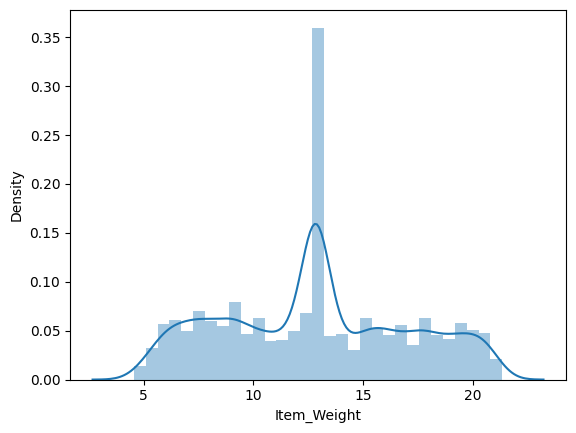

In [107]:
sns.distplot(df['Item_Weight'])

<Axes: xlabel='Item_Visibility', ylabel='Density'>

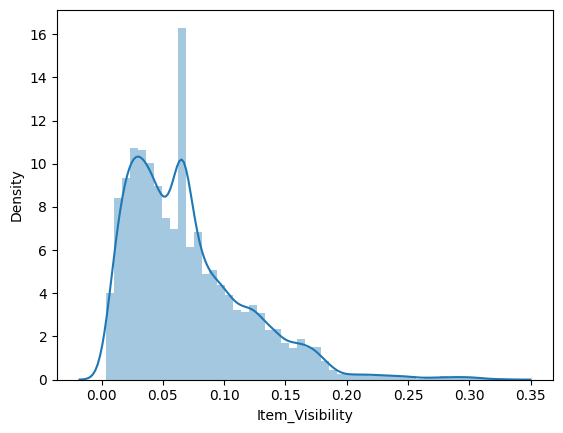

In [108]:
sns.distplot(df['Item_Visibility'])

<Axes: xlabel='Item_MRP', ylabel='Density'>

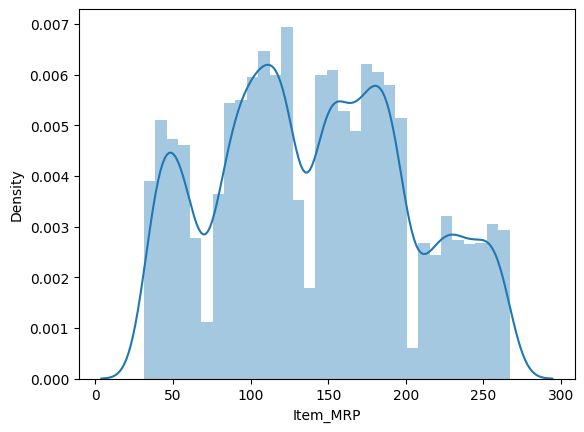

In [109]:
sns.distplot(df['Item_MRP'])

By visualizing this, we can make 4 classes for price of item, i.e. low, moderate, high, expensive

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

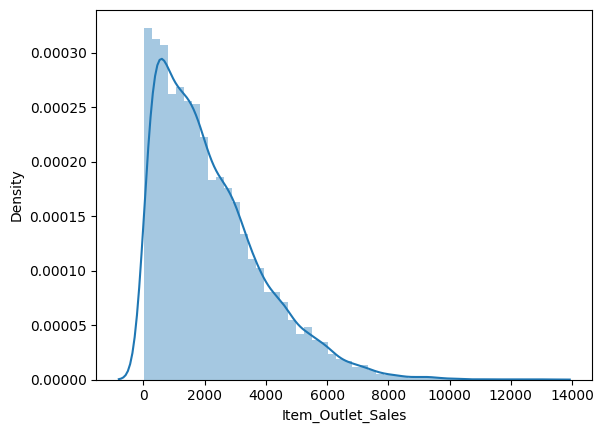

In [110]:
sns.distplot(train_df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

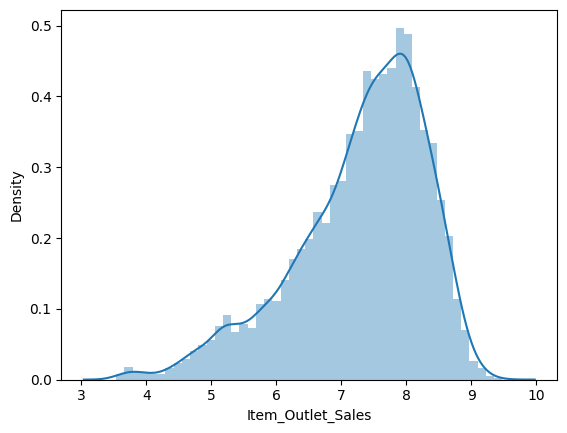

In [111]:
train_df['Item_Outlet_Sales'] = np.log(1+train_df['Item_Outlet_Sales'])
sns.distplot(train_df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

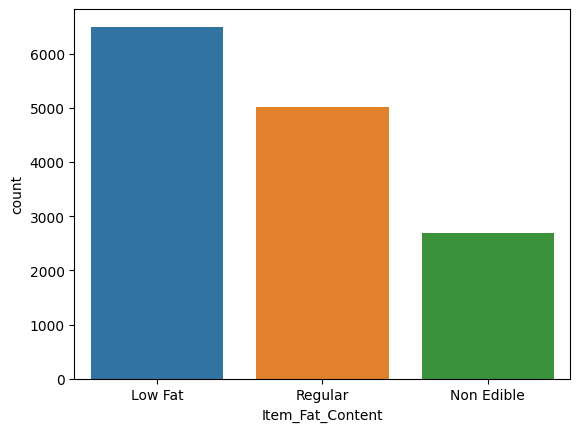

In [112]:
sns.countplot(x='Item_Fat_Content',data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

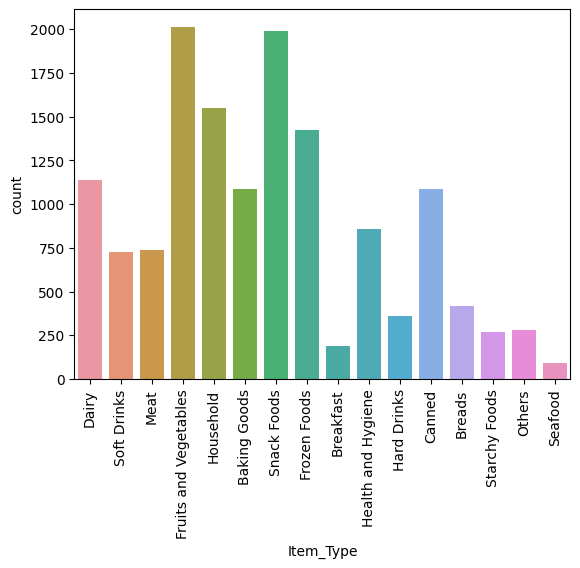

In [113]:
sns.countplot(data=df,x='Item_Type')
plt.xticks(rotation=90)

<Axes: xlabel='Outlet_Establishment_Year'>

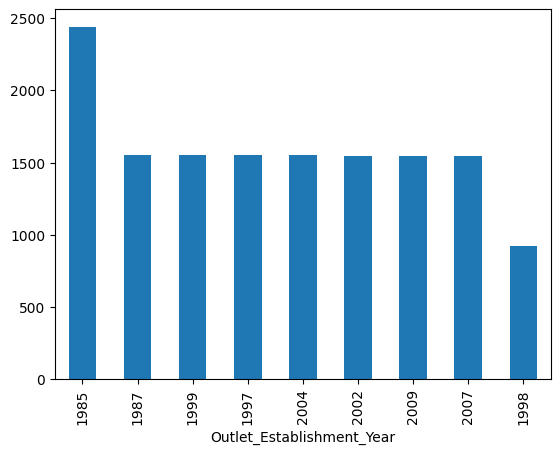

In [114]:
df['Outlet_Establishment_Year'].value_counts().plot(kind='bar')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

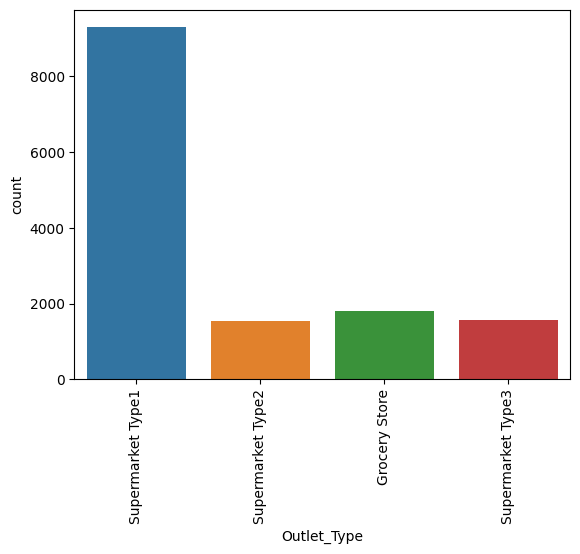

In [115]:
sns.countplot(data=df,x='Outlet_Type')
plt.xticks(rotation=90)

<Axes: xlabel='Outlet_Size', ylabel='count'>

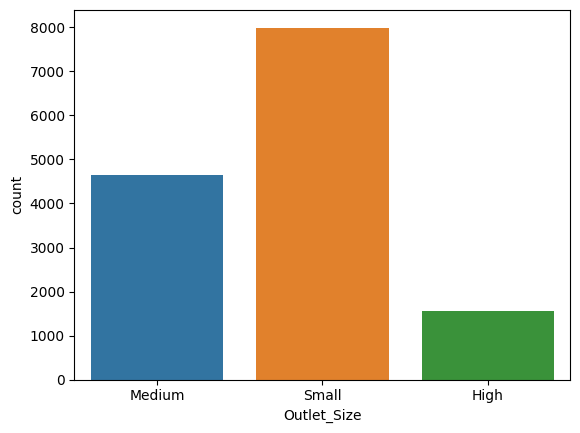

In [116]:
sns.countplot(data=df,x='Outlet_Size')

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

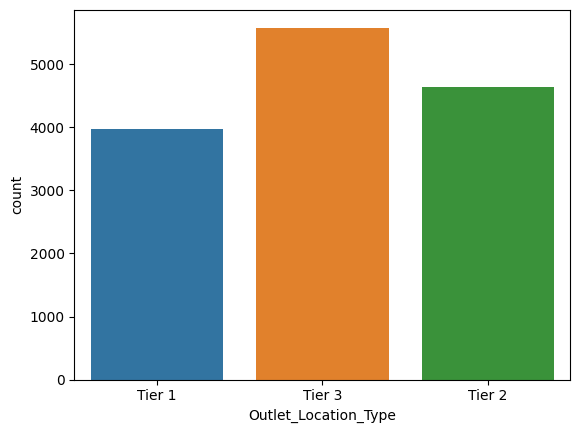

In [117]:
sns.countplot(data=df,x='Outlet_Location_Type')

### Correlation Matrix

In [118]:
new_df = df.drop(columns=cat_columns)
new_df = df.drop(columns={'Item_Identifier','Outlet_Identifier','Product_Type'})
new_df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Outlet_Years'],
      dtype='object')

<Axes: >

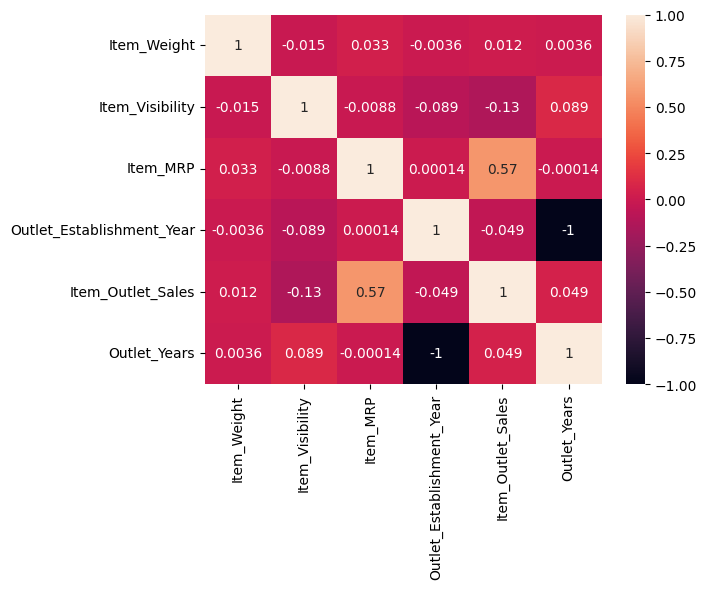

In [119]:
corr = df[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_Years']].corr()
sns.heatmap(corr,annot=True)

### Label Encoding & One Hot Encoding

In [120]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Product_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non Edible,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-consumable,26


In [121]:
df['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: count, dtype: int64

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
df['Item_Type'] = le.fit_transform(df['Item_Type'])

In [123]:
df = pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Product_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Product_Type_Drinks,Product_Type_Food,Product_Type_Non-consumable
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,3735.1380,14,9,...,True,False,False,False,True,False,False,False,True,False
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,443.4228,4,3,...,False,False,True,False,False,True,False,True,False,False
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,2097.2700,14,9,...,True,False,False,False,True,False,False,False,True,False
3,FDX07,19.20,0.065953,6,182.0950,OUT010,1998,732.3800,15,0,...,False,False,True,True,False,False,False,False,True,False
4,NCD19,8.93,0.065953,9,53.8614,OUT013,1987,994.7052,26,1,...,False,False,True,False,True,False,False,False,False,True


### Model Training

In [124]:
train_df = df.iloc[:train_df.shape[0],:]
test_df = df.iloc[train_df.shape[0]:,:]

In [125]:
print(train_df.shape)
print(test_df.shape)

(8523, 26)
(5681, 26)


In [126]:
train_df = train_df.drop(columns={'Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'})
X = train_df.drop(columns={'Item_Outlet_Sales'})
y = train_df['Item_Outlet_Sales']

In [143]:
X_test = test_df.drop(columns={'Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'})
X_test = X_test.drop(columns={'Item_Outlet_Sales'})

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = train_df.drop(columns={'Item_Outlet_Sales'}).columns
X = scaler.fit_transform(X)
X = pd.DataFrame(data=X,columns=cols)
X

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_Low Fat,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Size_High,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Product_Type_Drinks,Product_Type_Food,Product_Type_Non-consumable
0,-0.841872,-1.111109,-0.766479,1.747454,-0.139541,1.507813,1.084133,-0.480558,-0.738147,-0.350395,...,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
1,-1.641706,-1.044820,1.608963,-1.489023,-1.334103,-0.607071,-0.922396,-0.480558,1.354743,-0.350395,...,-0.623893,-0.696678,1.242650,-0.381529,-1.375891,2.860816,-0.351028,3.109193,-1.598190,-0.480558
2,1.098554,-1.096485,0.658786,0.010040,-0.139541,1.507813,1.084133,-0.480558,-0.738147,-0.350395,...,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
3,1.500838,-0.087189,-0.291391,0.660050,-0.020085,-1.664513,-0.922396,-0.480558,1.354743,-0.350395,...,-0.623893,-0.696678,1.242650,2.621031,-1.375891,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
4,-0.929428,-0.087189,0.421242,-1.399220,1.293934,-1.312032,-0.922396,2.080915,-0.738147,2.853918,...,-0.623893,-0.696678,1.242650,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,-1.598190,2.080915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.418084,-0.275319,1.371418,1.180783,1.293934,-1.312032,1.084133,-0.480558,-0.738147,2.853918,...,-0.623893,-0.696678,1.242650,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
8519,-1.059578,-0.476407,-1.716656,-0.527301,-0.497909,0.802852,-0.922396,-0.480558,1.354743,-0.350395,...,-0.623893,1.435383,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
8520,-0.534243,-0.718431,0.183698,-0.897208,-0.736822,0.450371,-0.922396,2.080915,-0.738147,-0.350395,...,-0.623893,1.435383,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,-1.598190,2.080915
8521,-1.336444,1.539166,1.371418,-0.607977,-1.334103,-0.607071,-0.922396,-0.480558,1.354743,-0.350395,...,-0.623893,-0.696678,1.242650,-0.381529,-1.375891,2.860816,-0.351028,-0.321627,0.625708,-0.480558


In [129]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def training(model,X,y):
    model.fit(X,y)
    y_pred = model.predict(X)
    cv_score = cross_val_score(model,X,y,scoring='neg_mean_squared_error')
    print("Model Report: ")
    print("MAE: ",mean_squared_error(y,y_pred))
    print("CV Score: ",np.abs(np.mean(cv_score)))

Model Report: 
MAE:  1271057.8962052218
CV Score:  1276841.7731074553


<Axes: title={'center': 'Model Coefficients'}>

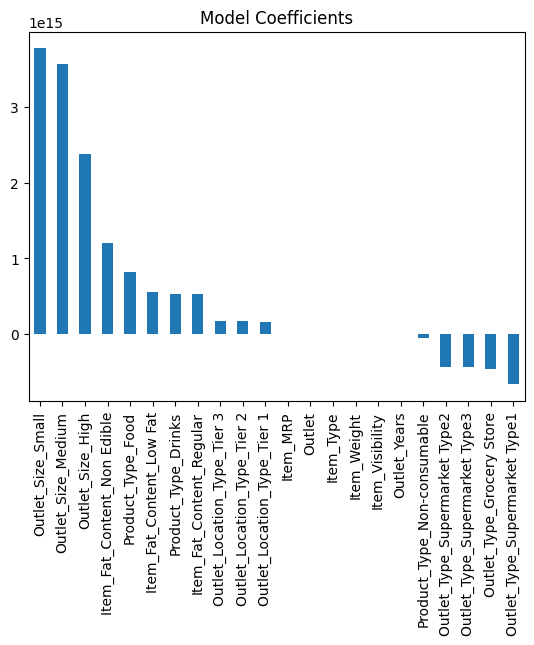

In [130]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr_model = LinearRegression()
training(lr_model,X,y)
coef = pd.Series(lr_model.coef_,X.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Model Coefficients')

Model Report: 
MAE:  1271209.5033174183
CV Score:  1277006.9054195199


<Axes: title={'center': 'Model Coefficients'}>

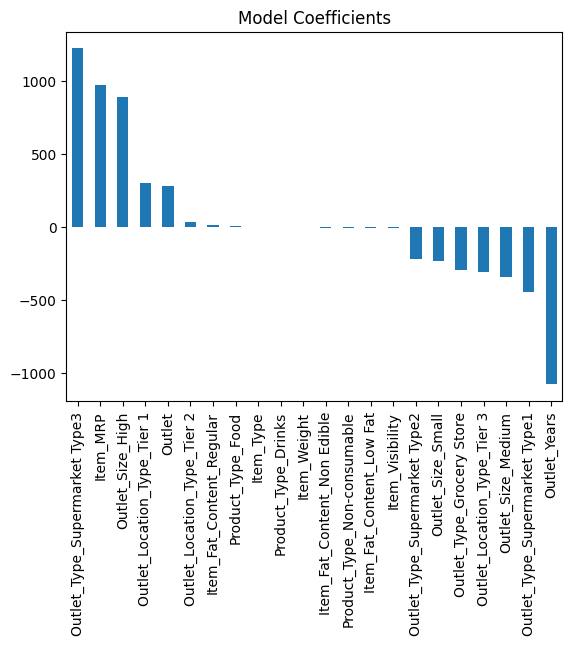

In [131]:
ridge_model = Ridge()
training(ridge_model,X,y)
coef = pd.Series(ridge_model.coef_,X.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Model Coefficients')

Model Report: 
MAE:  1273019.029235538
CV Score:  1278411.8733547505


<Axes: title={'center': 'Model Coefficients'}>

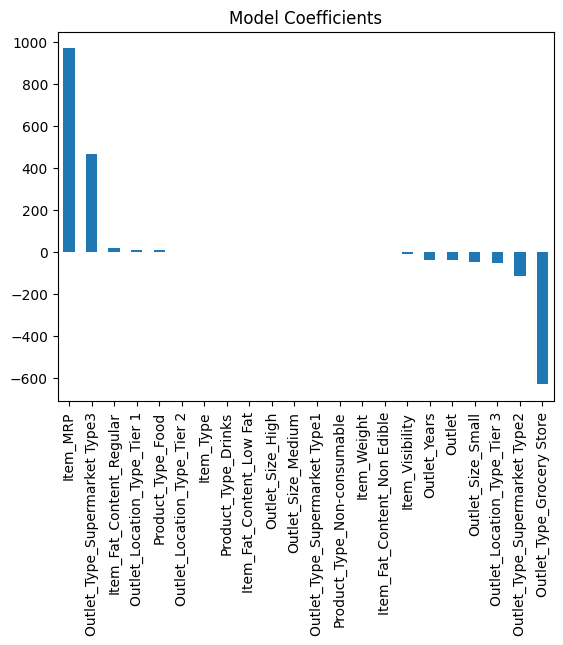

In [132]:
lasso_model = Lasso(alpha=0.6)
training(lasso_model,X,y)
coef = pd.Series(lasso_model.coef_,X.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Model Coefficients')

Model Report: 
MAE:  0.0
CV Score:  2449196.854910046


<Axes: title={'center': 'Feature Importances'}>

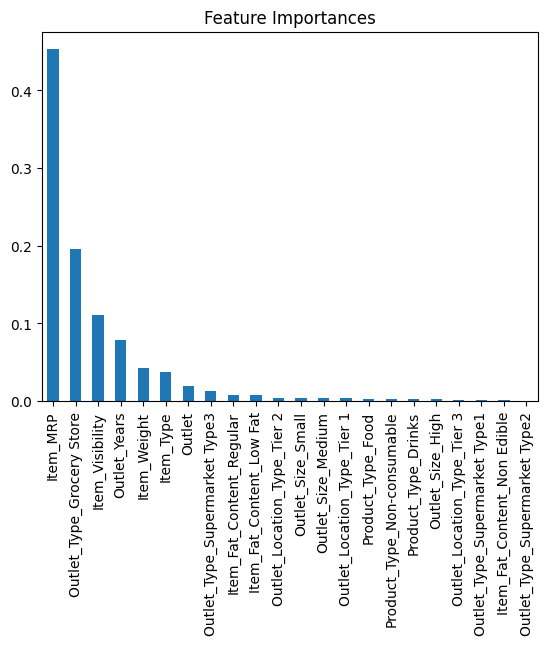

In [133]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
training(tree,X,y)
coef = pd.Series(tree.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importances')

Model Report: 
MAE:  180217.5739562013
CV Score:  1326389.0077404696


<Axes: title={'center': 'Feature Importances'}>

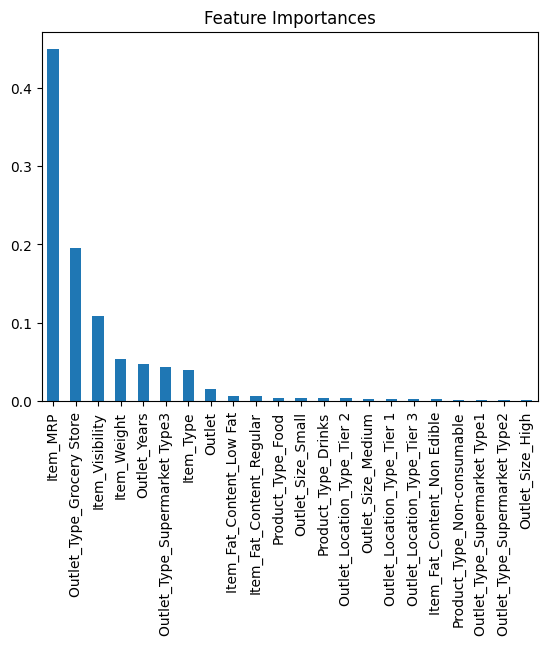

In [134]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
training(rf_model,X,y)
coef = pd.Series(rf_model.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importances')

Model Report: 
MAE:  0.0715376275271503
CV Score:  1410812.0149070711


<Axes: title={'center': 'Feature Importances'}>

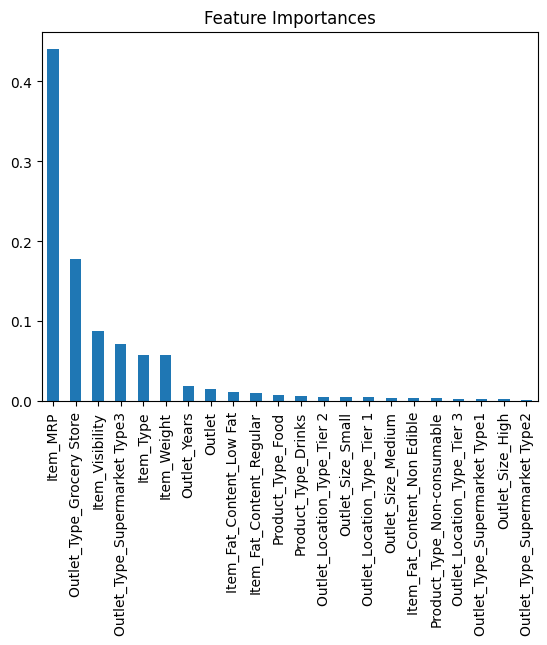

In [135]:
from sklearn.ensemble import ExtraTreesRegressor
ext_model = ExtraTreesRegressor()
training(ext_model,X,y)
coef = pd.Series(ext_model.feature_importances_,X.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importances')

### Prediction on Test data

In [145]:
model = RandomForestRegressor()
model.fit(X,y)
y_pred = model.predict(X_test)
y_pred

array([4626.750728, 4670.327338, 4645.013622, ..., 4741.767678,
       4718.1917  , 4704.662644])

In [149]:
submission = pd.DataFrame()
submission['Item_Identifier'] = test_df['Item_Identifier']
submission['Outlet_Identifier'] = test_df['Outlet_Identifier']
submission['Item_Outlet_Sales'] = y_pred
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,4626.750728
8524,FDW14,OUT017,4670.327338
8525,NCN55,OUT010,4645.013622
8526,FDQ58,OUT017,4489.276344
8527,FDY38,OUT027,4865.020574


In [150]:
submission.to_csv('my_submission.csv',index=False)